패키지 불러오기

In [ ]:
from google.colab import drive

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import missingno as msno
plt.style.use('fivethirtyeight')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

데이터 불러오기(구글드라이브 연동)

In [ ]:
train_data=pd.read_csv('drive/MyDrive/data/train.csv')
test_data=pd.read_csv('drive/MyDrive/data/test.csv')

데이터 둘러보기


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



•	Survived : 0 = 사망, 1 = 생존   
•	Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석  
•	Sex : male = 남성, female = 여성  
•	Age : 나이  
•	SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수  
•	Parch : 타이타닉 호에 동승한 부모 / 자식의 수  
•	Ticket : 티켓 번호  
•	Fare : 승객 요금  
•	Cabin : 방 호수  
•	Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

통계값 확인

In [ ]:
from pandas.core import describe
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


비어있는값 확인

In [ ]:
for col in train_data.columns :
    msg = '항목 {:>10}\t 비어있는 자료의 비율 : {:.2f}%'.format(col, 100 * (train_data[col].isnull().sum() / train_data[col].shape[0]))
    print(msg)


항목 PassengerId	 비어있는 자료의 비율 : 0.00%
항목   Survived	 비어있는 자료의 비율 : 0.00%
항목     Pclass	 비어있는 자료의 비율 : 0.00%
항목       Name	 비어있는 자료의 비율 : 0.00%
항목        Sex	 비어있는 자료의 비율 : 0.00%
항목        Age	 비어있는 자료의 비율 : 19.87%
항목      SibSp	 비어있는 자료의 비율 : 0.00%
항목      Parch	 비어있는 자료의 비율 : 0.00%
항목     Ticket	 비어있는 자료의 비율 : 0.00%
항목       Fare	 비어있는 자료의 비율 : 0.00%
항목      Cabin	 비어있는 자료의 비율 : 77.10%
항목   Embarked	 비어있는 자료의 비율 : 0.22%


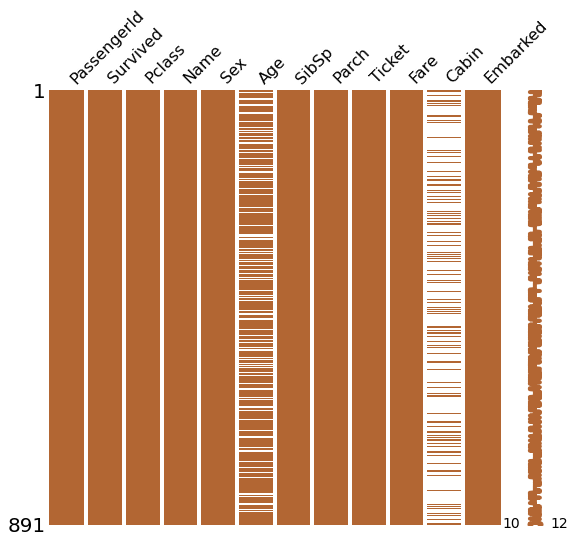

In [ ]:
msno.matrix(df=train_data.iloc[:,:], figsize=(8,8), color=(0.7,0.4,0.2))

사망자 분포 확인

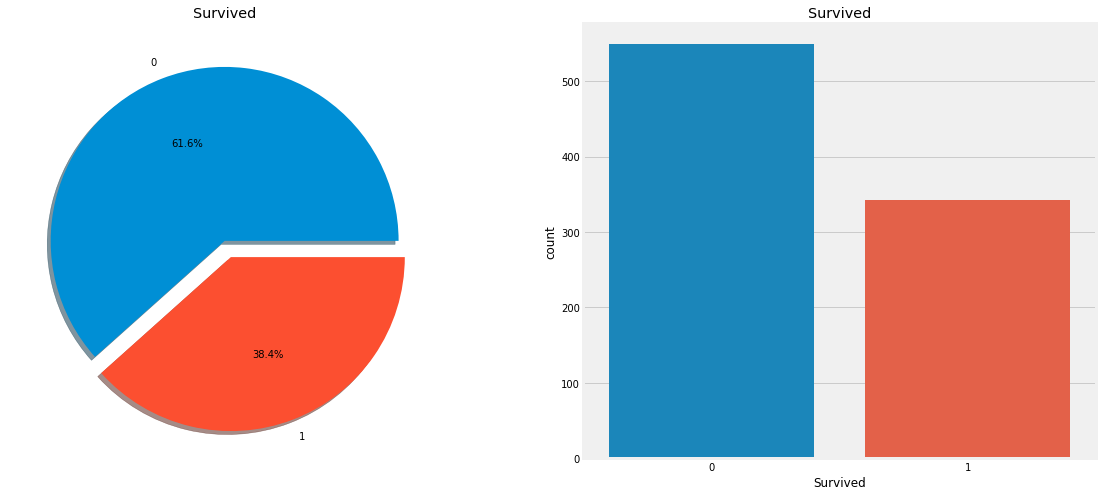

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()


성별에 따른 사망자와 생존자  
Sex : male = 남성, female = 여성

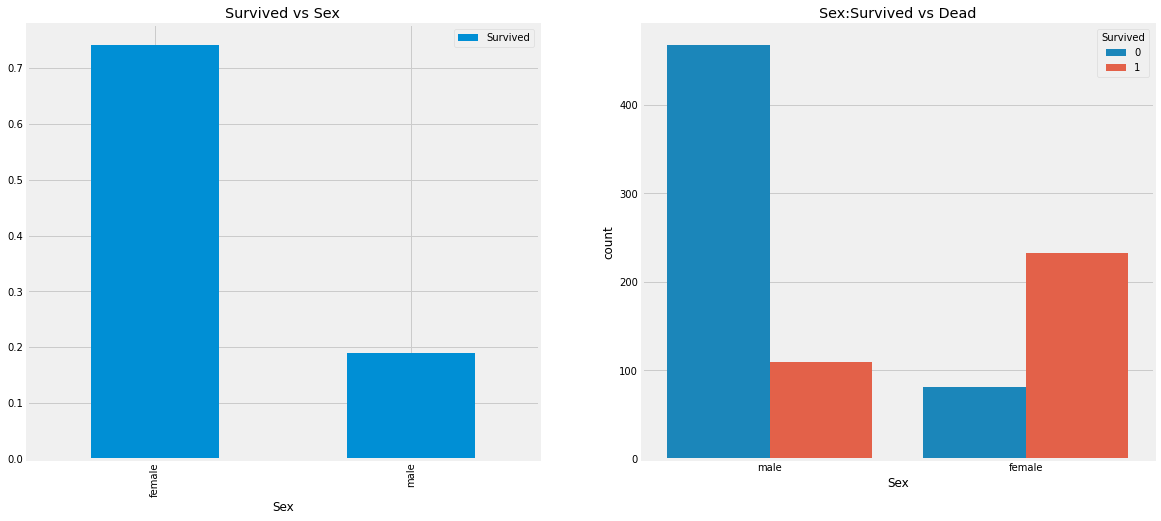

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

나이에 따른 사망자와 생존자

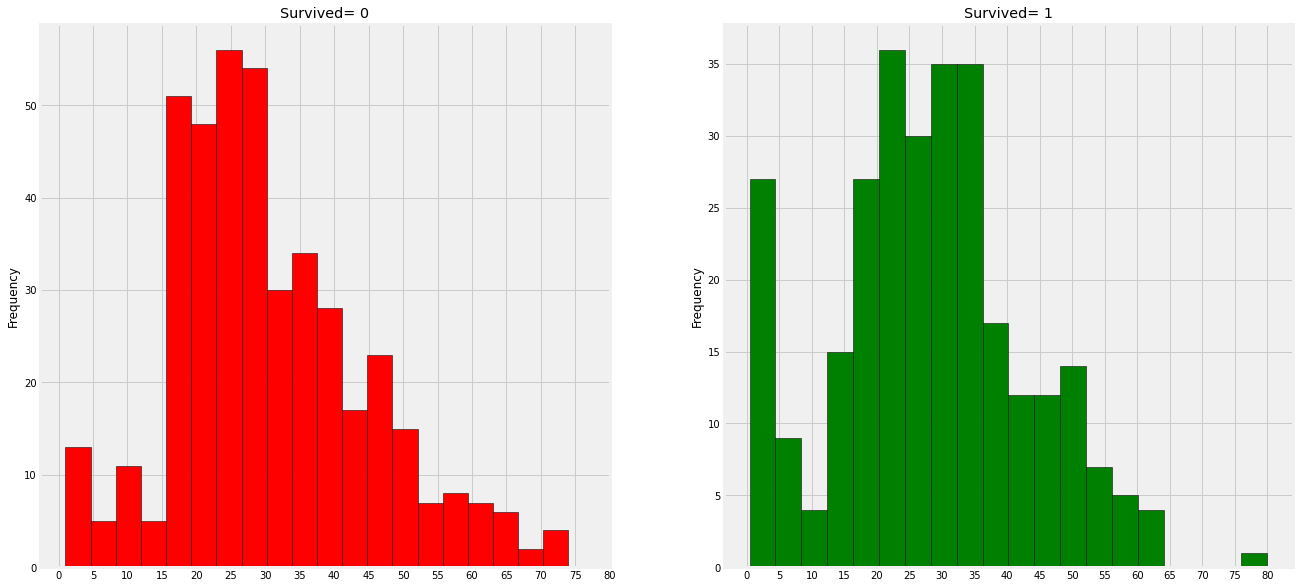

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

직관적 표현

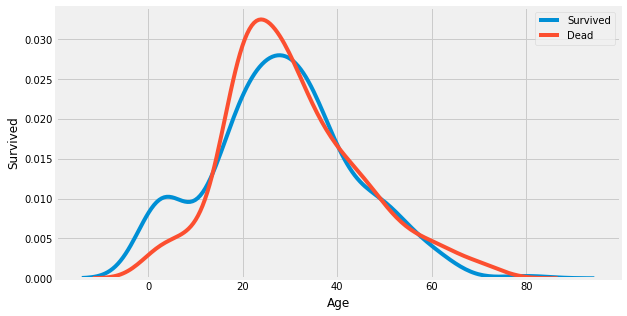

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(train_data[train_data['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


클래스에 따른 사망자와 생존자  
• Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석

In [ ]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


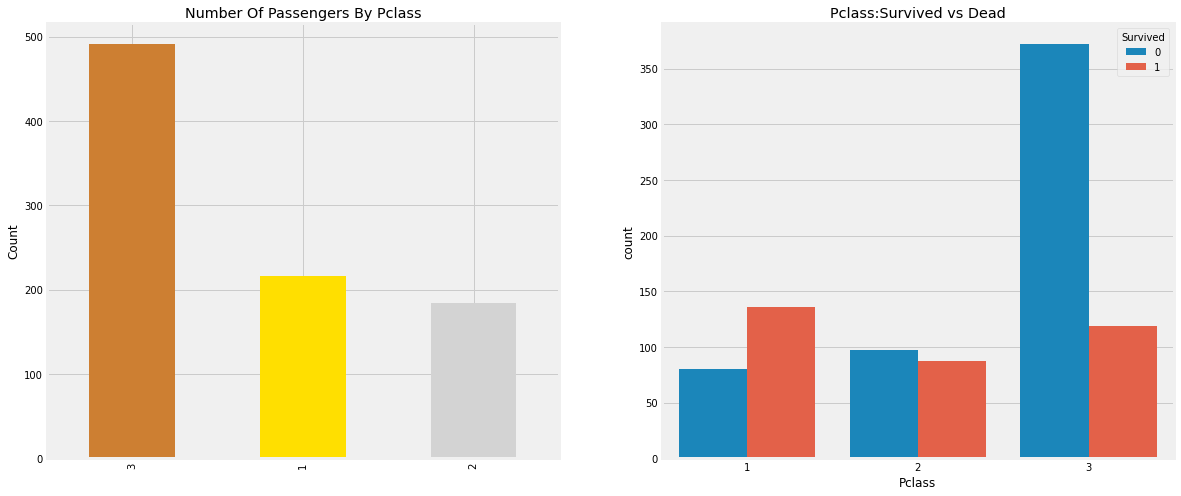

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


클래스별 성별에 따른 사망자와 생존자  
• Sex : male = 남성, female = 여성

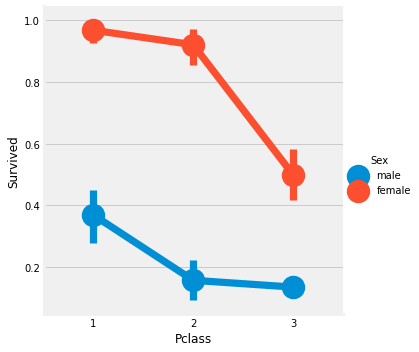

In [ ]:

sns.factorplot('Pclass','Survived',hue='Sex',data=train_data)
plt.show()


탑승장소를 기반으로한 다양한 데이터 조합들  
• Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

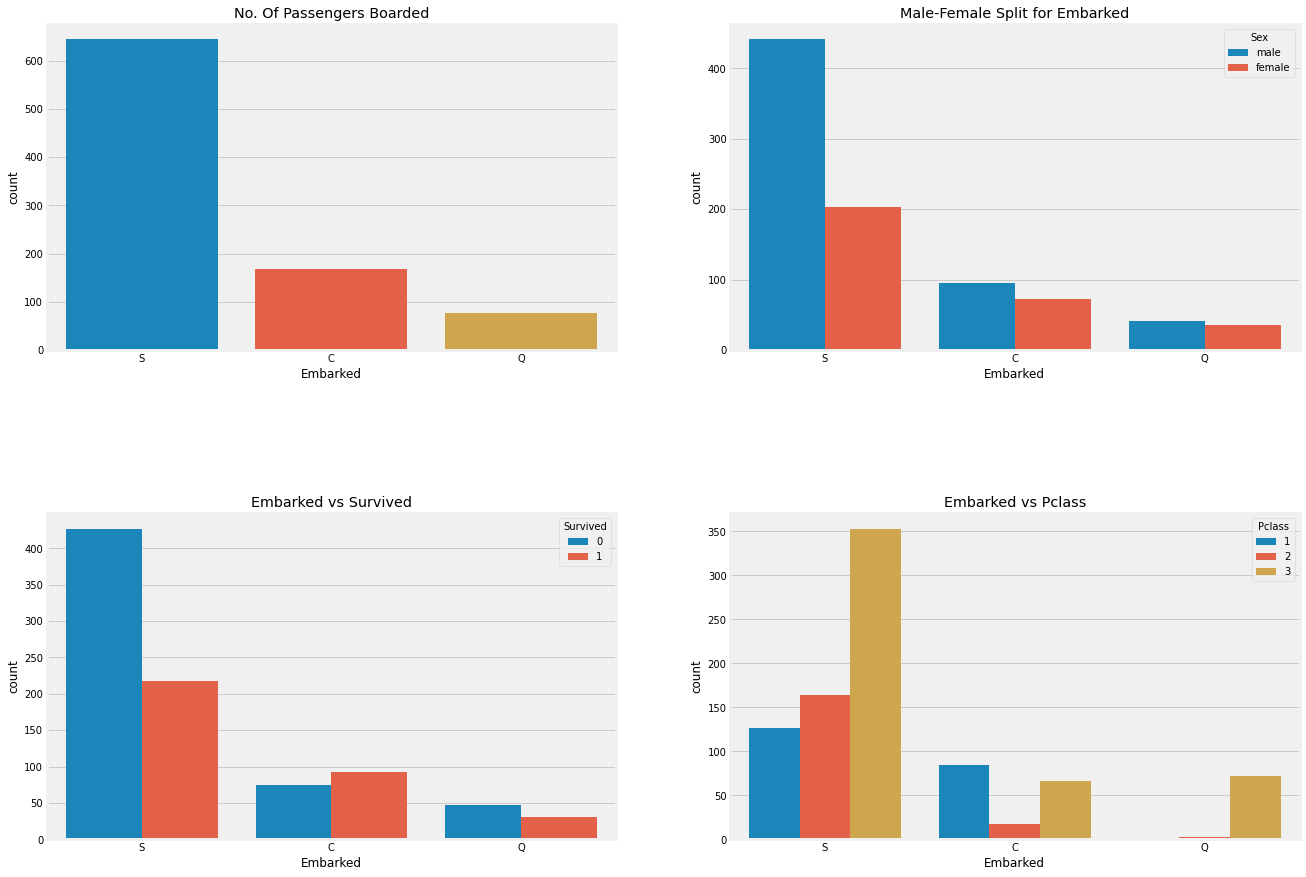

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train_data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train_data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train_data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


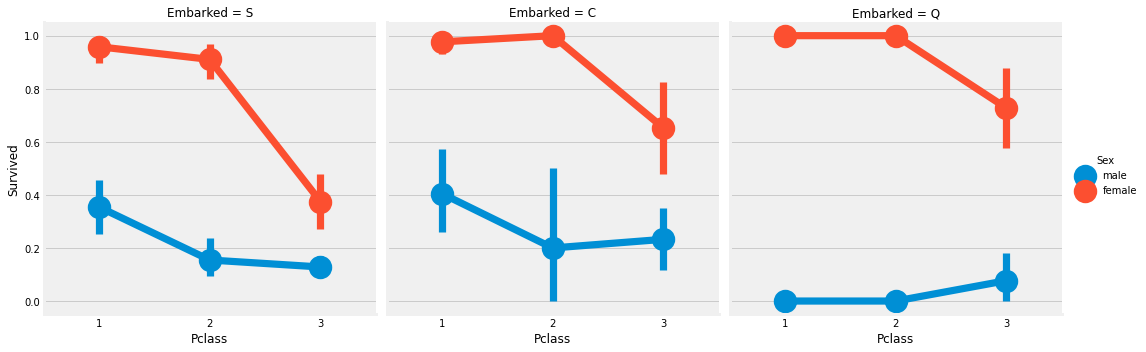

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_data)
plt.show()
